In [1]:
#configure a temp run engine environment

from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)

from bluesky.plans import scan

d:\bluesky_dev\tutorial_notebooks\.venv\lib\site-packages\setuptools_scm\_integration\setuptools.py:30: RuntimeWarning: 
ERROR: setuptools==49.2.1 is used in combination with setuptools_scm>=8.x

Your build configuration is incomplete and previously worked by accident!
setuptools_scm requires setuptools>=61

Suggested workaround if applicable:
 - migrating from the deprecated setup_requires mechanism to pep517/518
   and using a pyproject.toml to declare build dependencies
   which are reliably pre-installed before running the build tools

  warnings.warn(




Transient Scan ID: 1     Time: 2023-11-23 16:05:02
Persistent Unique Scan ID: '28ce23fb-3119-4009-8d1e-c5edf29fd43b'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
+-----------+------------+------------+------------+
generator scan ['28ce23fb'] (scan num: 1)





('28ce23fb-3119-4009-8d1e-c5edf29fd43b',)

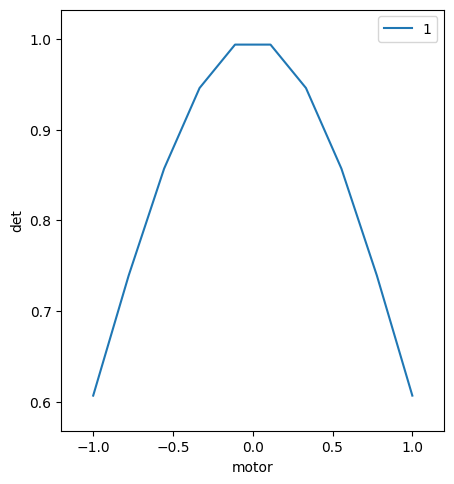

In [2]:
from ophyd.sim import det, motor

RE(scan([det],motor, 1,-1,10))



## Add the NeXus Writer callback



In [3]:
from apstools.callbacks import NXWriter
import pathlib
import os

h5_file = pathlib.Path(os.getcwd()+"/data/nxwriter.h5")

nxwriter = NXWriter()
RE.subscribe(nxwriter.receiver)
nxwriter.file_name = str(h5_file)
nxwriter.warn_on_missing_content = False



Transient Scan ID: 2     Time: 2023-11-23 16:05:03
Persistent Unique Scan ID: '158c38b3-eaf5-49d9-a1ff-f7e9b16a66ae'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 16:05:03.9 |      1.000 |      0.607 |
|         2 | 16:05:04.0 |      0.778 |      0.739 |
|         3 | 16:05:04.0 |      0.556 |      0.857 |
|         4 | 16:05:04.0 |      0.333 |      0.946 |
|         5 | 16:05:04.1 |      0.111 |      0.994 |
|         6 | 16:05:04.1 |     -0.111 |      0.994 |
|         7 | 16:05:04.2 |     -0.333 |      0.946 |
|         8 | 16:05:04.2 |     -0.556 |      0.857 |
|         9 | 16:05:04.3 |     -0.778 |      0.739 |
|        10 | 16:05:04.3 |     -1.000 |      0.607 |
+-----------+------------+------------+------------+
generator scan ['158c38b3'] (scan num: 2)





('158c38b3-eaf5-49d9-a1ff-f7e9b16a66ae',)

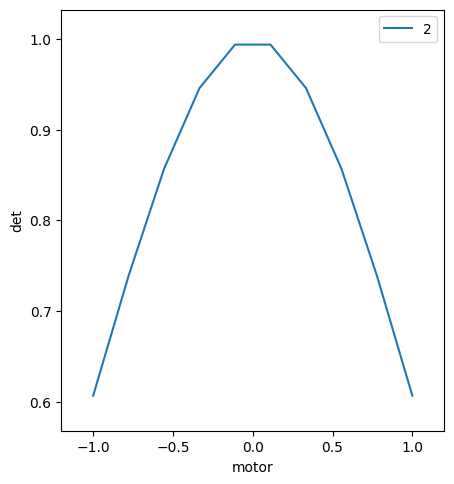

In [4]:
from ophyd.sim import det, motor

RE(scan([det],motor, 1,-1,10))